1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет(ресемплинг) в представление по 1 месяцу.

2. Подберите параметры модели SARIMAX для этого ряда.

3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

4. Возмите вариант 1 или 2

Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )
Оцените результат моделирования

5.Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import os

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

#### Задания 1-3

In [8]:
data = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


Недельная автокорелляция

In [9]:
w_data=data.resample('W').mean()
w_data.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


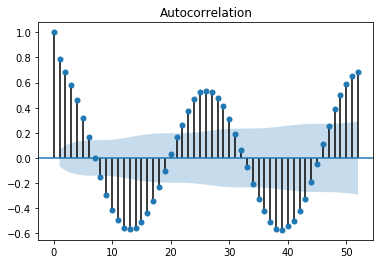

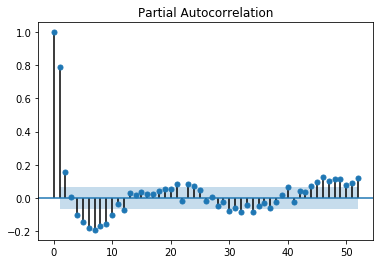

In [10]:
sm.graphics.tsa.plot_acf(w_data['PJME_MW'].values, lags=52)
plt.show()

sm.graphics.tsa.plot_pacf(w_data['PJME_MW'].values, lags=52)
plt.show()

Месячная автокорелляция

In [11]:
m_data=data.resample('M').mean()
m_data.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


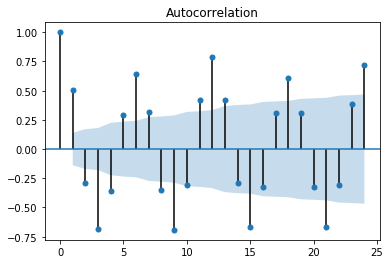

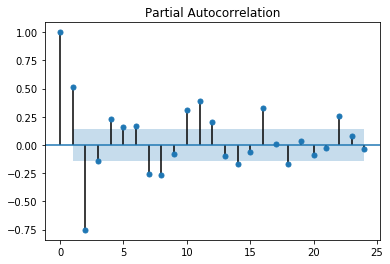

In [12]:
sm.graphics.tsa.plot_acf(m_data['PJME_MW'].values, lags=24)
plt.show()

sm.graphics.tsa.plot_pacf(m_data['PJME_MW'].values, lags=24)
plt.show()

При лаге 3, 6, 9 наблюдается наибольшие значения автокорреляции, также форма полученной кривой имеет периодический вид, что говорит о сезонности данного ряда

In [13]:
import itertools

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(m_data['PJME_MW'].values,order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as E:
            print(E)

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4699.195491264933
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:4290.040464872625
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3987.1764435562977
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3372.7214168798077
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:3143.0669287152477
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2904.7464905692473
ARIMA(0, 0, 1)x(0, 0, 0, 12)3 - AIC:4534.039921069969
ARIMA(0, 0, 1)x(0, 0, 1, 12)3 - AIC:4225.338467513422
ARIMA(0, 0, 1)x(0, 0, 2, 12)3 - AIC:3947.2810695606336
ARIMA(0, 0, 1)x(0, 1, 0, 12)3 - AIC:3330.6866857595214
ARIMA(0, 0, 1)x(0, 1, 1, 12)3 - AIC:3103.470814032794
ARIMA(0, 0, 1)x(0, 1, 2, 12)3 - AIC:2869.8038521474173
ARIMA(0, 0, 2)x(0, 0, 0, 12)3 - AIC:4478.921088805254
ARIMA(0, 0, 2)x(0, 0, 1, 12)3 - AIC:3776.199553148799
ARIMA(0, 0, 2)x(0, 0, 2, 12)3 - AIC:3924.8044087724465
ARIMA(0, 0, 2)x(0, 1, 0, 12)3 - AIC:3315.6786725106854
ARIMA(0, 0, 2)x(0, 1, 1, 12)3 - AIC:3087.8480678871892
ARIMA(0, 0, 2)x(0, 1, 2, 12)3 - AIC:2854.2202541760553
ARIMA(0, 1, 0)x(0

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 2, 12)3 - AIC:3279.4803554569903
ARIMA(1, 0, 0)x(0, 1, 0, 12)3 - AIC:3350.4034264431248
ARIMA(1, 0, 0)x(0, 1, 1, 12)3 - AIC:3117.3003840103247
ARIMA(1, 0, 0)x(0, 1, 2, 12)3 - AIC:2877.8527152902157
ARIMA(1, 0, 1)x(0, 0, 0, 12)3 - AIC:3753.0410598169665
ARIMA(1, 0, 1)x(0, 0, 1, 12)3 - AIC:3472.9127622104143


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 2, 12)3 - AIC:3283.497682139524
ARIMA(1, 0, 1)x(0, 1, 0, 12)3 - AIC:3332.641810034559
ARIMA(1, 0, 1)x(0, 1, 1, 12)3 - AIC:3093.70901303118
ARIMA(1, 0, 1)x(0, 1, 2, 12)3 - AIC:2862.8868070740773
ARIMA(1, 0, 2)x(0, 0, 0, 12)3 - AIC:3694.4217078220145
ARIMA(1, 0, 2)x(0, 0, 1, 12)3 - AIC:3429.840870652599
ARIMA(1, 0, 2)x(0, 0, 2, 12)3 - AIC:3648.737974619511
ARIMA(1, 0, 2)x(0, 1, 0, 12)3 - AIC:3317.1947539495604
ARIMA(1, 0, 2)x(0, 1, 1, 12)3 - AIC:3063.0269812590677
ARIMA(1, 0, 2)x(0, 1, 2, 12)3 - AIC:2844.136826639293
ARIMA(1, 1, 0)x(0, 0, 0, 12)3 - AIC:3771.460929304395
ARIMA(1, 1, 0)x(0, 0, 1, 12)3 - AIC:3469.2479605832095
ARIMA(1, 1, 0)x(0, 0, 2, 12)3 - AIC:3229.6887246005417
ARIMA(1, 1, 0)x(0, 1, 0, 12)3 - AIC:3387.0280409419893
ARIMA(1, 1, 0)x(0, 1, 1, 12)3 - AIC:3117.6158483813697
ARIMA(1, 1, 0)x(0, 1, 2, 12)3 - AIC:2894.4623409350597
ARIMA(1, 1, 1)x(0, 0, 0, 12)3 - AIC:3735.470452230811
ARIMA(1, 1, 1)x(0, 0, 1, 12)3 - AIC:3438.8382631710037
ARIMA(1, 1, 1)x(0, 

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(0, 1, 1, 12)3 - AIC:3077.510503131112


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(0, 1, 2, 12)3 - AIC:2830.639981266543
ARIMA(2, 0, 0)x(0, 0, 0, 12)3 - AIC:3772.653128854749
ARIMA(2, 0, 0)x(0, 0, 1, 12)3 - AIC:3502.511879828984
ARIMA(2, 0, 0)x(0, 0, 2, 12)3 - AIC:3705.3914759303398
ARIMA(2, 0, 0)x(0, 1, 0, 12)3 - AIC:3333.6012795642027
ARIMA(2, 0, 0)x(0, 1, 1, 12)3 - AIC:3118.8060815716603
ARIMA(2, 0, 0)x(0, 1, 2, 12)3 - AIC:2879.7962079279823
ARIMA(2, 0, 1)x(0, 0, 0, 12)3 - AIC:3791.2099876001034
ARIMA(2, 0, 1)x(0, 0, 1, 12)3 - AIC:3497.3020046054426
ARIMA(2, 0, 1)x(0, 0, 2, 12)3 - AIC:3241.3695618729344
ARIMA(2, 0, 1)x(0, 1, 0, 12)3 - AIC:3334.2467900355646
ARIMA(2, 0, 1)x(0, 1, 1, 12)3 - AIC:3111.8770864992985
ARIMA(2, 0, 1)x(0, 1, 2, 12)3 - AIC:2869.3147443584326
ARIMA(2, 0, 2)x(0, 0, 0, 12)3 - AIC:3674.7839107361906
ARIMA(2, 0, 2)x(0, 0, 1, 12)3 - AIC:3404.29849829761


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 0, 2, 12)3 - AIC:3584.4242628239
ARIMA(2, 0, 2)x(0, 1, 0, 12)3 - AIC:3318.085391735595
ARIMA(2, 0, 2)x(0, 1, 1, 12)3 - AIC:3072.033369347876
ARIMA(2, 0, 2)x(0, 1, 2, 12)3 - AIC:2846.1178477245185
ARIMA(2, 1, 0)x(0, 0, 0, 12)3 - AIC:3672.8859589699305
ARIMA(2, 1, 0)x(0, 0, 1, 12)3 - AIC:3446.6316497497455
ARIMA(2, 1, 0)x(0, 0, 2, 12)3 - AIC:3214.5408363665347
ARIMA(2, 1, 0)x(0, 1, 0, 12)3 - AIC:3342.0152219982883
ARIMA(2, 1, 0)x(0, 1, 1, 12)3 - AIC:3098.5456425856587
ARIMA(2, 1, 0)x(0, 1, 2, 12)3 - AIC:2877.364778767411
ARIMA(2, 1, 1)x(0, 0, 0, 12)3 - AIC:3565.042021954855
ARIMA(2, 1, 1)x(0, 0, 1, 12)3 - AIC:3339.333891845032
ARIMA(2, 1, 1)x(0, 0, 2, 12)3 - AIC:3127.077380562733
ARIMA(2, 1, 1)x(0, 1, 0, 12)3 - AIC:3344.0071262568463
ARIMA(2, 1, 1)x(0, 1, 1, 12)3 - AIC:3074.298709955059
ARIMA(2, 1, 1)x(0, 1, 2, 12)3 - AIC:2845.3910284293497
ARIMA(2, 1, 2)x(0, 0, 0, 12)3 - AIC:3543.5028406361444
ARIMA(2, 1, 2)x(0, 0, 1, 12)3 - AIC:3291.4719467845152
ARIMA(2, 1, 2)x(0, 0

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 1, 2, 12)3 - AIC:2827.863396255012
ARIMA(2, 2, 0)x(0, 0, 0, 12)3 - AIC:3796.4080556520125
ARIMA(2, 2, 0)x(0, 0, 1, 12)3 - AIC:3543.26670379754
ARIMA(2, 2, 0)x(0, 0, 2, 12)3 - AIC:3301.5056771867903
ARIMA(2, 2, 0)x(0, 1, 0, 12)3 - AIC:3417.7638368482403
ARIMA(2, 2, 0)x(0, 1, 1, 12)3 - AIC:3172.347851750187
ARIMA(2, 2, 0)x(0, 1, 2, 12)3 - AIC:2951.10440039311
ARIMA(2, 2, 1)x(0, 0, 0, 12)3 - AIC:3713.110346132447
ARIMA(2, 2, 1)x(0, 0, 1, 12)3 - AIC:3432.2931779872924
ARIMA(2, 2, 1)x(0, 0, 2, 12)3 - AIC:3202.5266263362582
ARIMA(2, 2, 1)x(0, 1, 0, 12)3 - AIC:3379.4773584358236
ARIMA(2, 2, 1)x(0, 1, 1, 12)3 - AIC:3095.2594470087997
ARIMA(2, 2, 1)x(0, 1, 2, 12)3 - AIC:2850.1160832020396
ARIMA(2, 2, 2)x(0, 0, 0, 12)3 - AIC:3558.5022320132
ARIMA(2, 2, 2)x(0, 0, 1, 12)3 - AIC:3335.3208730795486
ARIMA(2, 2, 2)x(0, 0, 2, 12)3 - AIC:3121.408221929736
ARIMA(2, 2, 2)x(0, 1, 0, 12)3 - AIC:3359.0733970968727
ARIMA(2, 2, 2)x(0, 1, 1, 12)3 - AIC:3067.2427627177494
ARIMA(2, 2, 2)x(0, 1,

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [14]:
N1 =0
N2=24
nforecast = N2+12

mod = sm.tsa.statespace.SARIMAX(m_data['PJME_MW'].values[N1:-N2],order=[0,1,2],
                                seasonal_order=[0,1,2,12] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results.summary().tables[0],results.summary().tables[1])

AIC:{}                                  Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  200
Model:             SARIMAX(2, 2, 2)x(0, 1, 2, 12)   Log Likelihood               -1420.773
Date:                            Mon, 01 Jun 2020   AIC                           2855.545
Time:                                    19:16:35   BIC                           2877.027
Sample:                                         0   HQIC                          2864.269
                                            - 200                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------

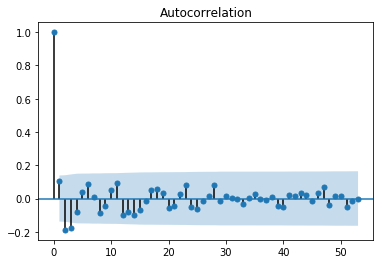

In [11]:
sm.graphics.tsa.plot_acf(results.resid, lags=53)
plt.show()

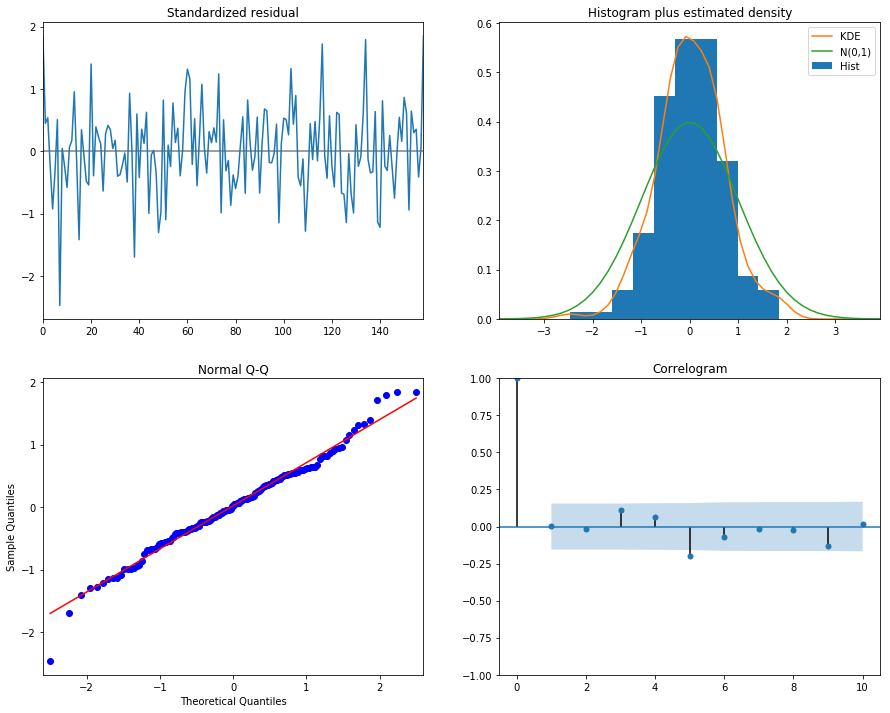

In [12]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [13]:
predict_ = results_opt.get_prediction(end=results_opt.nobs + nforecast)

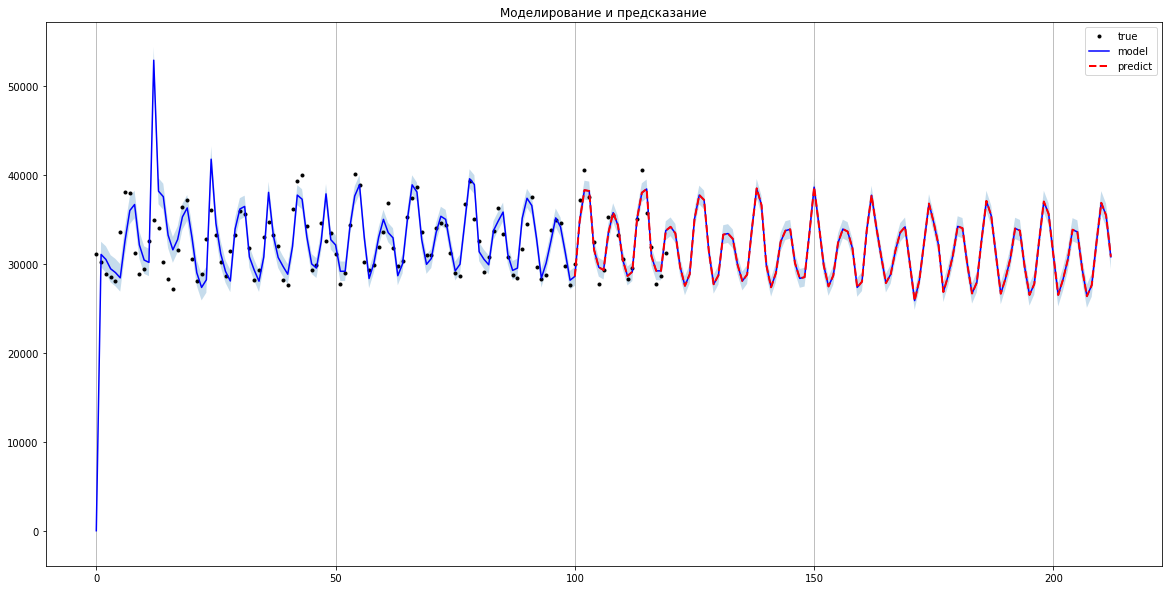

In [24]:
idx = np.arange(len(predict_.predicted_mean))
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.grid()
ax.plot(m_data['PJME_MW'].values[:120], 'k.',label='true')

# 
ax.plot(idx, predict_.predicted_mean, 'blue',label = 'model')
ax.plot(idx[100:], predict_.predicted_mean[100:], 'r--', linestyle='--', linewidth=2, label='predict')
ax.fill_between(idx, predict_ci[0:, 0], predict_ci[0:, 1], alpha=0.25)
plt.legend()
ax.set(title='Моделирование и предсказание');

Прогноз повторяет ход кривой

#### Задания 4,5 (Вариант 1)

In [3]:
brent = pd.read_csv('my_BRENT2019.csv', index_col=[0], parse_dates=[0])
brent.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [4]:
w_brent=brent.resample('W').mean()
w_brent.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


ACF и RACF модели

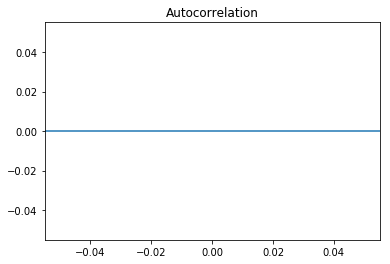

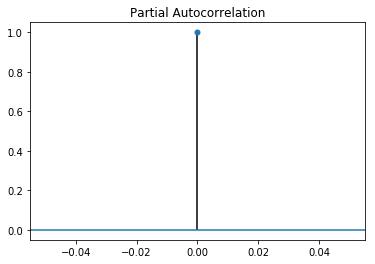

In [21]:
brent_dif = w_brent['Значение'].diff(1)
sm.graphics.tsa.plot_acf(w_brent['Значение'].values, lags=12)
plt.show()

sm.graphics.tsa.plot_pacf(w_brent['Значение'].values, lags=12)
plt.show()

Модели имеют нулевые значения, это говорит нам о том, что значения никак между собой не связаны

Подбор коэффициентов ARIMA при коэффициентах сезонности равных 0

In [6]:
import itertools

d = [0,1]
p = [0,1] 
q = range(0, 7)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0]


for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(np.log(w_brent['Значение'].values[:-200]),
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except Exception as E:
        print(E)

D:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x[0, 0, 0, 0] - AIC:-74.72773620804573
ARIMA(0, 0, 1)x[0, 0, 0, 0] - AIC:-409.19343049008205


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x[0, 0, 0, 0] - AIC:-629.929605697484
ARIMA(0, 0, 3)x[0, 0, 0, 0] - AIC:-532.0401837196569
ARIMA(0, 0, 4)x[0, 0, 0, 0] - AIC:-595.1033595304558


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 5)x[0, 0, 0, 0] - AIC:-856.3743180998798


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 6)x[0, 0, 0, 0] - AIC:-921.5838386881996
ARIMA(0, 1, 0)x[0, 0, 0, 0] - AIC:-1138.2415823961471


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x[0, 0, 0, 0] - AIC:-1158.2445207934647
ARIMA(0, 1, 2)x[0, 0, 0, 0] - AIC:-1150.689951011155
ARIMA(0, 1, 3)x[0, 0, 0, 0] - AIC:-1146.8905882882646
ARIMA(0, 1, 4)x[0, 0, 0, 0] - AIC:-1141.3450778372373


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 5)x[0, 0, 0, 0] - AIC:-1134.3413641161935
ARIMA(0, 1, 6)x[0, 0, 0, 0] - AIC:-1127.0644945248237
ARIMA(1, 0, 0)x[0, 0, 0, 0] - AIC:-1143.720176817908


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:-1164.2023840977156
ARIMA(1, 0, 2)x[0, 0, 0, 0] - AIC:-1156.7003078483212


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x[0, 0, 0, 0] - AIC:-1152.5089330241121


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 4)x[0, 0, 0, 0] - AIC:-1146.4379925259382
ARIMA(1, 0, 5)x[0, 0, 0, 0] - AIC:-1140.167675990605
ARIMA(1, 0, 6)x[0, 0, 0, 0] - AIC:-1133.1217139723017
ARIMA(1, 1, 0)x[0, 0, 0, 0] - AIC:-1164.0739871650876


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x[0, 0, 0, 0] - AIC:-1156.9330902127713
ARIMA(1, 1, 2)x[0, 0, 0, 0] - AIC:-1149.7855108141334
ARIMA(1, 1, 3)x[0, 0, 0, 0] - AIC:-1144.8318198894244
ARIMA(1, 1, 4)x[0, 0, 0, 0] - AIC:-1138.972348919052


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 5)x[0, 0, 0, 0] - AIC:-1133.3550725864075
ARIMA(1, 1, 6)x[0, 0, 0, 0] - AIC:-1125.3568980479454


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [37]:
N1=100
N2=30
nforecast = N2+42
modb_optd = sm.tsa.statespace.SARIMAX(brent_dif[100:-100],
                               order=[1,0,0],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_optd = modb_optd.fit()
#делаем предсказание на 3 точки от текущего конца ряда
pred_dynamic_opt = resultsb_optd.forecast(nforecast) 

plt.plot(pred_dynamic_opt.values,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(brent_dif.values[-N2:-1],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 42 точек ряда')
plt.ylim([-10,10])
plt.legend()
plt.plot()
plt.show()

ValueError: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions

In [38]:
N2=30
nforecast = N2+42

modb_opt = sm.tsa.statespace.SARIMAX(w_brent['Значение'].values[:-N2],
                               order=[1,0,1],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_opt = modb_opt.fit()

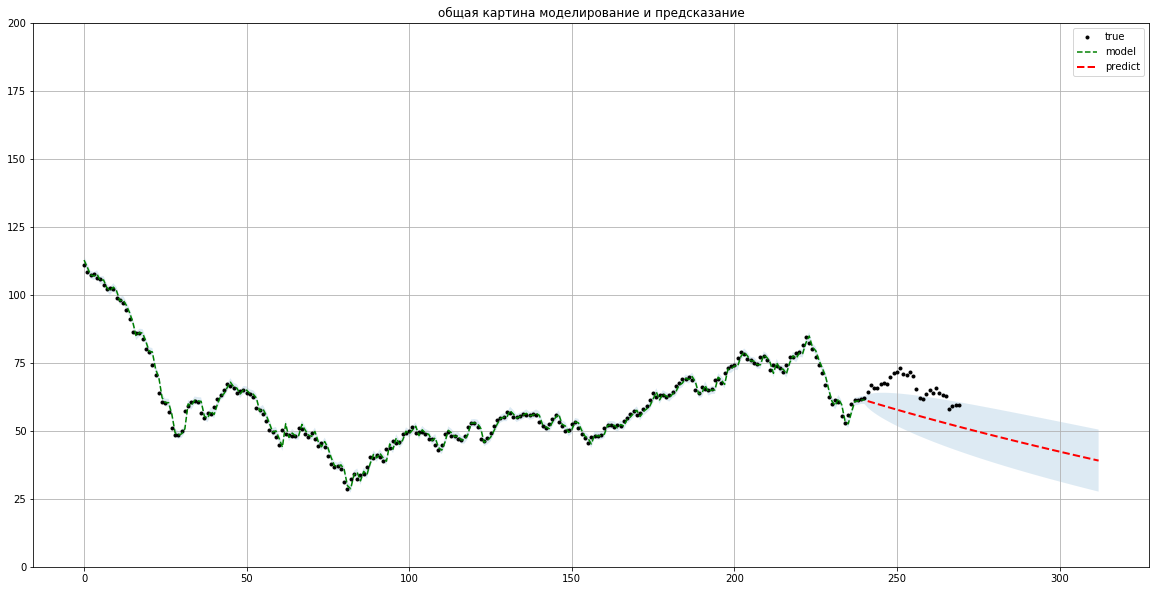

In [40]:
N3=200
predict_ = resultsb_opt.get_prediction(end=resultsb_opt.nobs + nforecast)   

idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)


fig, ax = plt.subplots(figsize=(20,10))
ax.plot(w_brent['Значение'].values[N3:], 'k.',label='true')
plt.ylim([0,200])
plt.grid()
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], '--g',label='model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2,label = 'predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.15)
plt.legend()

ax.set(title='общая картина моделирование и предсказание');

Полученная модель предсказала снижение цены в краткосрочном периоде, но не её ход в целом

Модель ARIMA лучше всего подходит для сезонных, циклических временных рядов, т.е. там, где выражена автокорреляция между своими значениями внутри ряда